In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ucimlrepo import fetch_ucirepo 

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
red_wine_path = "data/wine/winequality-red.csv"
white_wine_path = "data/wine/winequality-white.csv"

# Load the datasets
red_wine = pd.read_csv(red_wine_path, sep=';')
white_wine = pd.read_csv(white_wine_path, sep=';')

# Display basic information about the datasets
red_wine_info = red_wine.info()
white_wine_info = white_wine.info()

# Display the first few rows of each dataset to confirm loading
red_wine_head = red_wine.head()
white_wine_head = white_wine.head()

red_wine_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# Add a 'type' column to distinguish between red and white wine, then combine datasets
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combine the datasets
combined_wine = pd.concat([red_wine, white_wine], axis=0).reset_index(drop=True)

# Convert the 'type' column to numerical values (e.g., red=0, white=1) for model compatibility
combined_wine['type'] = combined_wine['type'].map({'red': 0, 'white': 1})

# Display basic info about the combined dataset
combined_wine_info = combined_wine.info()
combined_wine_head = combined_wine.head()

combined_wine_info, combined_wine_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


(None,
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  type  
 0      9.4        5     0  
 1     

In [14]:
# Features and target variables
X = combined_wine.drop(columns=["quality"])  # Use all columns except 'quality' for prediction
y = combined_wine["quality"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train the SVM classifier
svm_model = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

conf_matrix, class_report

/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

(array([[  0,   0,   3,   3,   0,   0,   0],
        [  0,   1,  29,  13,   0,   0,   0],
        [  0,   0, 257, 171,   0,   0,   0],
        [  0,   0, 107, 432,  28,   0,   0],
        [  0,   0,   3, 157,  56,   0,   0],
        [  0,   0,   0,  24,  15,   0,   0],
        [  0,   0,   0,   0,   1,   0,   0]]),
 '              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         6\n           4       1.00      0.02      0.05        43\n           5       0.64      0.60      0.62       428\n           6       0.54      0.76      0.63       567\n           7       0.56      0.26      0.35       216\n           8       0.00      0.00      0.00        39\n           9       0.00      0.00      0.00         1\n\n    accuracy                           0.57      1300\n   macro avg       0.39      0.23      0.24      1300\nweighted avg       0.57      0.57      0.54      1300\n')

In [15]:
# Train SVM with balanced class weights
svm_balanced = SVC(kernel="rbf", C=1, gamma="scale", class_weight="balanced", random_state=42)
svm_balanced.fit(X_train, y_train)

# Predictions and evaluation
y_pred_balanced = svm_balanced.predict(X_test)

# Evaluate the model
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
class_report_balanced = classification_report(y_test, y_pred_balanced)

print("Confusion Matrix (Balanced SVM):")
print(conf_matrix_balanced)
print("\nClassification Report (Balanced SVM):")
print(class_report_balanced)

Confusion Matrix (Balanced SVM):
[[  1   2   1   2   0   0   0]
 [  3  24   9   3   3   0   1]
 [ 10  90 226  71  21   9   1]
 [  9  46 135 156 144  77   0]
 [  1   6   7  38  88  76   0]
 [  0   2   0   1  16  20   0]
 [  0   0   0   0   0   1   0]]

Classification Report (Balanced SVM):
              precision    recall  f1-score   support

           3       0.04      0.17      0.07         6
           4       0.14      0.56      0.23        43
           5       0.60      0.53      0.56       428
           6       0.58      0.28      0.37       567
           7       0.32      0.41      0.36       216
           8       0.11      0.51      0.18        39
           9       0.00      0.00      0.00         1

    accuracy                           0.40      1300
   macro avg       0.26      0.35      0.25      1300
weighted avg       0.51      0.40      0.42      1300



In [18]:
# Use SelectKBest to keep the top 10 most relevant features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_scaled, y)

# Check selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Redo the train-test split with selected features
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42, stratify=y)

Selected Features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'alcohol', 'type'],
      dtype='object')


In [21]:
# Define parameter grid
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", "auto", 0.1, 1],
    "kernel": ["rbf"]
}

# Perform grid search
grid_search = GridSearchCV(SVC(class_weight="balanced", random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_new, y_train_new)

/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [26]:
# Get the best parameters from the refined grid
best_params = grid_search.best_params_
print("Best parameters from refined grid:", best_params)

Best parameters from refined grid: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [27]:
# Train the final model using the best parameters
final_model = SVC(**best_params, class_weight="balanced", random_state=42)
final_model.fit(X_train_new, y_train_new)

# Evaluate the final model
y_pred_final = final_model.predict(X_test_new)
conf_matrix_final = confusion_matrix(y_test_new, y_pred_final)
class_report_final = classification_report(y_test_new, y_pred_final)

print("Final Confusion Matrix:")
print(conf_matrix_final)
print("\nFinal Classification Report:")
print(class_report_final)

Final Confusion Matrix:
[[  0   2   3   1   0   0   0]
 [  0  10  17  12   3   0   1]
 [  0  13 291 105  18   1   0]
 [  1   7 125 335  87  12   0]
 [  0   0  16  48 138  14   0]
 [  0   0   3  11   7  18   0]
 [  0   0   0   0   0   1   0]]

Final Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.31      0.23      0.27        43
           5       0.64      0.68      0.66       428
           6       0.65      0.59      0.62       567
           7       0.55      0.64      0.59       216
           8       0.39      0.46      0.42        39
           9       0.00      0.00      0.00         1

    accuracy                           0.61      1300
   macro avg       0.36      0.37      0.37      1300
weighted avg       0.61      0.61      0.61      1300



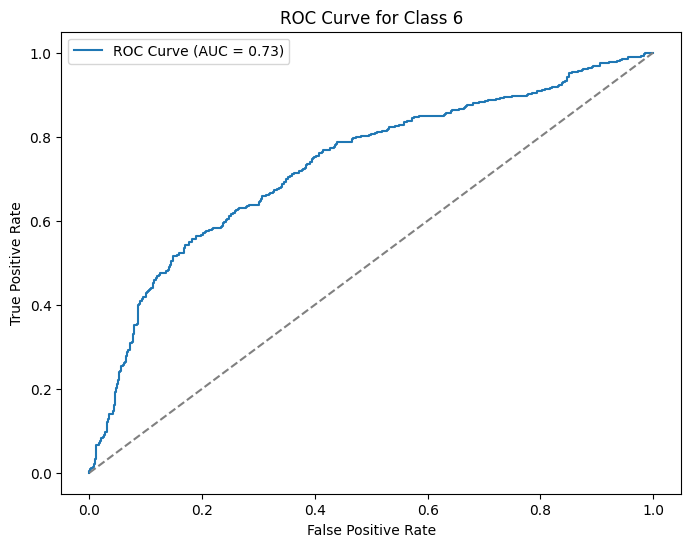

In [29]:
# Example: Classify quality 6 as the positive class
pos_class = 6
y_score = final_model.decision_function(X_test_new)[:, pos_class - 3]  # Adjust for 0-based indexing
y_true = (y_test_new == pos_class).astype(int)  # Convert to binary: 1 for positive class, 0 otherwise

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_score)
auc_score = roc_auc_score(y_true, y_score)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve for Class {pos_class}")
plt.legend(loc="best")
plt.show()

## Random Forest

In [31]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

In [32]:
# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(
    RandomForestClassifier(class_weight="balanced", random_state=42),
    param_grid_rf,
    cv=5,
    scoring="accuracy"
)
rf_grid_search.fit(X_train_new, y_train_new)

# Get the best parameters
best_rf_params = rf_grid_search.best_params_
print("Best Random Forest Parameters:", best_rf_params)

/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [33]:
# Train the best Random Forest model
rf_best_model = rf_grid_search.best_estimator_
rf_best_model.fit(X_train_new, y_train_new)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [34]:
# Predictions and evaluation
rf_pred = rf_best_model.predict(X_test_new)
rf_conf_matrix = confusion_matrix(y_test_new, rf_pred)
rf_class_report = classification_report(y_test_new, rf_pred)

print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)
print("\nRandom Forest Classification Report:")
print(rf_class_report)

Random Forest Confusion Matrix:
[[  0   0   4   1   1   0   0]
 [  0   4  21  17   1   0   0]
 [  0   2 304 120   2   0   0]
 [  0   3  76 451  37   0   0]
 [  0   0  11  80 124   1   0]
 [  0   0   2  12  11  14   0]
 [  0   0   0   1   0   0   0]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.44      0.09      0.15        43
           5       0.73      0.71      0.72       428
           6       0.66      0.80      0.72       567
           7       0.70      0.57      0.63       216
           8       0.93      0.36      0.52        39
           9       0.00      0.00      0.00         1

    accuracy                           0.69      1300
   macro avg       0.50      0.36      0.39      1300
weighted avg       0.69      0.69      0.68      1300



/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## Logistic Regression

In [35]:
# Define the parameter grid for Logistic Regression
param_grid_lr = {
    "C": [0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs", "saga"]
}

In [38]:
# Perform GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(
    LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    param_grid_lr,
    cv=5,
    scoring="accuracy"
)
lr_grid_search.fit(X_train_new, y_train_new)

# Get the best parameters
best_lr_params = lr_grid_search.best_params_
print("Best Logistic Regression Parameters:", best_lr_params)

/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which

Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


/Users/danielkong/miniforge3/envs/cogs118a/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [39]:
# Train the best Logistic Regression model
lr_best_model = lr_grid_search.best_estimator_
lr_best_model.fit(X_train_new, y_train_new)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=42)

In [40]:
# Predictions and evaluation
lr_pred = lr_best_model.predict(X_test_new)
lr_conf_matrix = confusion_matrix(y_test_new, lr_pred)
lr_class_report = classification_report(y_test_new, lr_pred)

print("Logistic Regression Confusion Matrix:")
print(lr_conf_matrix)
print("\nLogistic Regression Classification Report:")
print(lr_class_report)

Logistic Regression Confusion Matrix:
[[  2   2   0   1   0   0   1]
 [  9  20   7   2   1   3   1]
 [ 51  94 166  67  26  15   9]
 [ 46  58 101 137  93 101  31]
 [ 13   6  17  33  46  77  24]
 [  1   1   5   2  11  14   5]
 [  0   0   0   0   0   1   0]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           3       0.02      0.33      0.03         6
           4       0.11      0.47      0.18        43
           5       0.56      0.39      0.46       428
           6       0.57      0.24      0.34       567
           7       0.26      0.21      0.23       216
           8       0.07      0.36      0.11        39
           9       0.00      0.00      0.00         1

    accuracy                           0.30      1300
   macro avg       0.23      0.29      0.19      1300
weighted avg       0.48      0.30      0.35      1300

